# Evaluation of CosmoFlow training

In [1]:
import os
import sys
import yaml

sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [3]:
from models import get_model
from data.cosmo import construct_dataset
from utils.optimizers import get_optimizer

Using TensorFlow backend.


In [4]:
%matplotlib inline

## Load configuration

In [5]:
def load_config(config_file):
    """Reads the YAML config file and returns a config dictionary"""
    with open(config_file) as f:
        return yaml.load(f, Loader=yaml.FullLoader)

In [6]:
config_file = '../configs/cosmo.yaml'

In [7]:
config = load_config(config_file)

In [8]:
config

{'output_dir': '$SCRATCH/cosmoflow-benchmark/cosmoflow-19-06-19',
 'data': {'name': 'cosmo',
  'data_dir': '/project/projectdirs/m3363/www/cosmoUniverse_2019_02_4parE/dim128_cube_nT4',
  'n_train_files': 640,
  'n_valid_files': 256,
  'samples_per_file': 64,
  'sample_shape': [128, 128, 128, 4],
  'batch_size': 1,
  'n_epochs': 64},
 'model': {'name': 'cosmojan',
  'input_shape': [128, 128, 128, 4],
  'target_size': 4,
  'dropout': 0.2},
 'optimizer': {'name': 'Adadelta', 'lr': 0.5, 'lr_scaling': 'none'},
 'train': {'loss': 'mse',
  'metrics': ['mae'],
  'lr_schedule': [{'start_epoch': 16, 'end_epoch': 32, 'multiplier': 0.3},
   {'start_epoch': 32, 'end_epoch': 64, 'multiplier': 0.1}]}}

## View training history

In [9]:
def load_history(result_dir):
    return pd.read_csv(os.path.join(result_dir, 'history.csv'))

In [10]:
ls /global/cscratch1/sd/sfarrell/cosmoflow-benchmark

cosmoflow-154846/  cosmoflow-157761/  cosmoflow-158235/    cosmoflow-19-06-19/
cosmoflow-154858/  cosmoflow-158072/  cosmoflow-158333/    cosmoflow-hvd/
cosmoflow-154996/  cosmoflow-158127/  cosmoflow-19-06-11/  cosmoflow-test/
cosmoflow-155912/  cosmoflow-158130/  cosmoflow-19-06-12/  data/
cosmoflow-155987/  cosmoflow-158215/  cosmoflow-19-06-13/
cosmoflow-156746/  cosmoflow-158230/  cosmoflow-19-06-17/


In [11]:
result_dir = os.path.expandvars(config['output_dir'])
#result_dir = '/global/cscratch1/sd/sfarrell/cosmoflow-benchmark/cosmoflow-19-06-17'

In [12]:
ls -l $result_dir

total 58888
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 06:31 checkpoint-001.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 06:56 checkpoint-002.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 07:22 checkpoint-003.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 07:47 checkpoint-004.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 08:12 checkpoint-005.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 08:38 checkpoint-006.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 09:02 checkpoint-007.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 09:27 checkpoint-008.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 09:52 checkpoint-009.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 10:18 checkpoint-010.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 10:43 checkpoint-011.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 11:08 checkpoint-012.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 11:34 checkpoint-013.h5
-rw-rw---- 1 sfarrell sfarrell 939056 Jun 20 11:59 checkpoint-014.h5
-rw-rw---- 1 sfarrell 

In [13]:
train_history = load_history(result_dir)

In [14]:
train_history

,epoch,loss,lr,mean_absolute_error,val_loss,val_mean_absolute_error
0,0,0.339049,0.50000,0.434486,0.164307,0.322503
1,1,0.149852,0.50000,0.306790,0.106238,0.257490
2,2,0.117685,0.50000,0.270638,0.092737,0.239901
3,3,0.103733,0.50000,0.253621,0.079904,0.221149
4,4,0.095800,0.50000,0.242850,0.088182,0.230454
5,5,0.090553,0.50000,0.235761,0.118770,0.269581
6,6,0.086443,0.50000,0.230229,0.079308,0.222289
7,7,0.083545,0.50000,0.225880,0.093966,0.246369
8,8,0.080192,0.50000,0.221277,0.061325,0.188998
9,9,0.077836,0.50000,0.217703,0.061517,0.188816


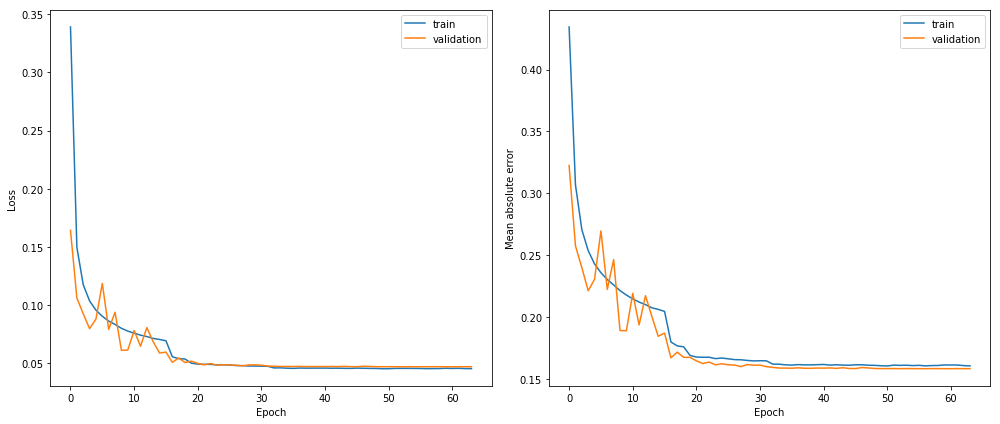

In [15]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(14, 6))

ax0.plot(train_history.loss, label='train')
ax0.plot(train_history.val_loss, label='validation')
ax0.set_xlabel('Epoch')
ax0.set_ylabel('Loss')
ax0.legend(loc=0)

ax1.plot(train_history.mean_absolute_error, label='train')
ax1.plot(train_history.val_mean_absolute_error, label='validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean absolute error')
ax1.legend(loc=0)

plt.tight_layout()

## Reload the model

In [16]:
# Choose best epoch based on validation loss
best_epoch = train_history.epoch.loc[train_history.val_loss.idxmin()]
print('Best epoch:', best_epoch)

Best epoch: 60


In [17]:
import models.cosmojan

# Load the model checkpoint
checkpoint = os.path.join(result_dir, 'checkpoint-{epoch:03d}.h5'.format(epoch=best_epoch+1))
model = tf.keras.models.load_model(checkpoint)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 127, 127, 127, 16) 528       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 127, 127, 127, 16) 0         
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 63, 63, 16)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 62, 62, 62, 16)    2064      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 62, 62, 62, 16)    0 

## Evaluate the model on a test set

In [18]:
def convert_data_to_np(dataset, n_steps):
    iter_next = dataset.make_one_shot_iterator().get_next()
    with tf.Session() as sess:
        converted_data = [sess.run(iter_next) for i in range(n_steps)]
        return map(np.concatenate, zip(*converted_data))

def convert_labels_to_np(dataset, n_steps):
    iter_next = dataset.make_one_shot_iterator().get_next()
    with tf.Session() as sess:
        return np.concatenate([sess.run(iter_next)[1] for i in range(n_steps)])

In [19]:
n_test_files = 16
data_config = config['data']
batch_size = 8 #data_config['batch_size']
data_dir = data_config['data_dir']
n_test = n_test_files * data_config['samples_per_file']
n_test_steps = n_test // batch_size

In [20]:
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir)
             if f.endswith('tfrecords')]
test_files = all_files[-n_test_files:]

In [21]:
# Construct the test dataset
test_data = construct_dataset(test_files, batch_size=batch_size, n_epochs=1,
                              sample_shape=[128, 128, 128, 4])

In [22]:
# Apply the model to the test set
test_pred = model.predict(test_data, steps=n_test_steps, verbose=1)

128/128 [==============================] - 400s 3s/step


In [23]:
test_y = convert_labels_to_np(test_data, n_test_steps)

## Model analysis

Let's make some detailed plots to understand the performance of the model

In [24]:
# Small sample of the test set for plotting input data distributions
n_sample_steps = 2
sample_x, sample_y = convert_data_to_np(test_data, n_sample_steps)

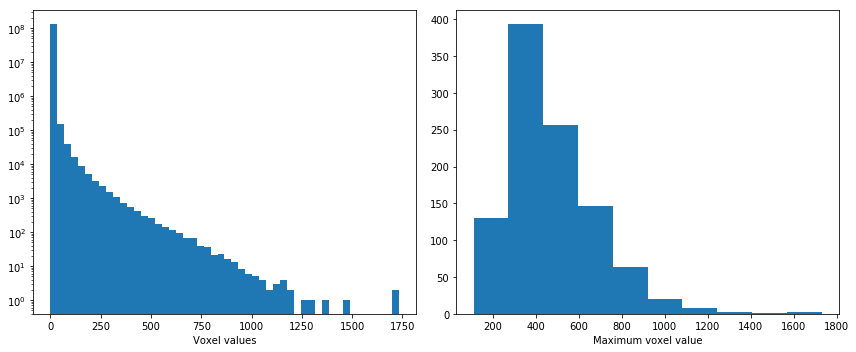

In [25]:
# Voxel value distributions
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 5))

# Voxel value
ax0.hist(sample_x.flatten(), log=True, bins=50)
ax0.set_xlabel('Voxel values')

# Maximum voxel value
ax1.hist(sample_x.reshape(n_test, -1).max(axis=1))
ax1.set_xlabel('Maximum voxel value')

plt.tight_layout()

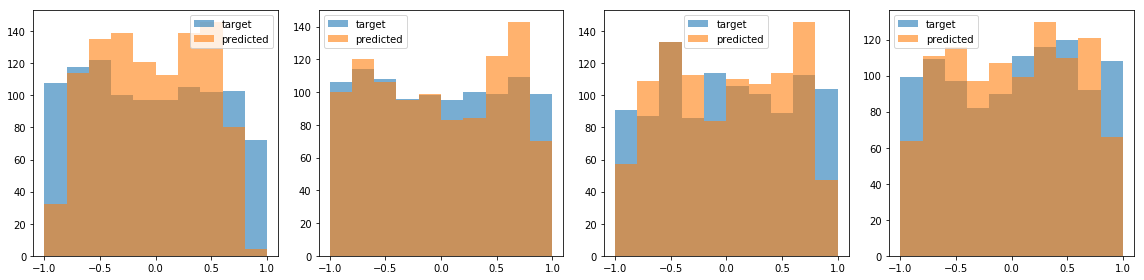

In [29]:
# 1D Distributions of cosmo params
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

hist_args = dict(bins=10, range=(-1,1), alpha=0.6)
ax0.hist(test_y[:,0], label='target', **hist_args)
ax0.hist(test_pred[:,0], label='predicted', **hist_args)
ax0.legend(loc=0)
ax1.hist(test_y[:,1], label='target', **hist_args)
ax1.hist(test_pred[:,1], label='predicted', **hist_args)
ax1.legend(loc=0)
ax2.hist(test_y[:,2], label='target', **hist_args)
ax2.hist(test_pred[:,2], label='predicted', **hist_args)
ax2.legend(loc=0)
ax3.hist(test_y[:,3], label='target', **hist_args)
ax3.hist(test_pred[:,3], label='predicted', **hist_args)
ax3.legend(loc=0)
plt.tight_layout()

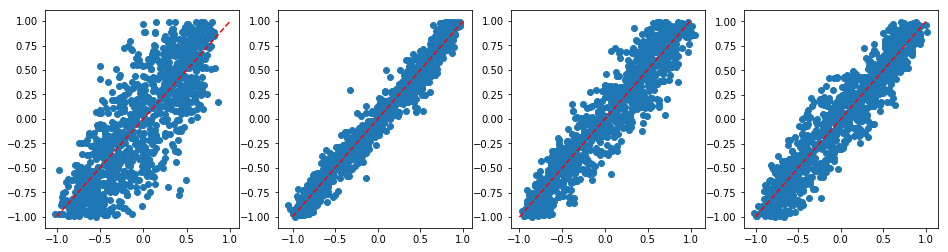

In [31]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

ax0.scatter(test_pred[:,0], test_y[:,0])
ax0.plot([-1, 1], [-1, 1], 'r--')
ax1.scatter(test_pred[:,1], test_y[:,1])
ax1.plot([-1, 1], [-1, 1], 'r--')
ax2.scatter(test_pred[:,2], test_y[:,2])
ax2.plot([-1, 1], [-1, 1], 'r--')
ax3.scatter(test_pred[:,3], test_y[:,3])
ax3.plot([-1, 1], [-1, 1], 'r--')

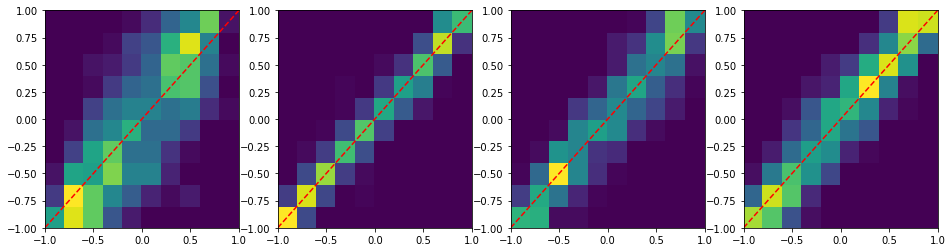

In [33]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

ax0.hist2d(test_pred[:,0], test_y[:,0], bins=10, range=[[-1,1],[-1,1]])
ax0.plot([-1, 1], [-1, 1], 'r--')
ax1.hist2d(test_pred[:,1], test_y[:,1], bins=10, range=[[-1,1],[-1,1]])
ax1.plot([-1, 1], [-1, 1], 'r--')
ax2.hist2d(test_pred[:,2], test_y[:,2], bins=10, range=[[-1,1],[-1,1]])
ax2.plot([-1, 1], [-1, 1], 'r--')
ax3.hist2d(test_pred[:,3], test_y[:,3], bins=10, range=[[-1,1],[-1,1]])
ax3.plot([-1, 1], [-1, 1], 'r--');

## Discussion

This model is performing better in some parameters than others, but it is certainly converging.